## Hanoi Towers

import **matplotlib** module for visualzing purpose.

In [49]:
import matplotlib.pyplot as plt

Define a **decorator** to count nomber of calls.

In [28]:
def count_calls(counter):
    def decorator(func):
        def wrapper(n, fr, to, help):
            params = f"{n}, {fr}, {to}, {help}"
            counter[params] = 1 if params not in counter else counter[params]+1
            return func(n, fr, to, help)
        return wrapper
    return decorator

Define a function to calcute total nomber of calls

In [32]:
def get_total(counts):
    total= 0
    for key,value in counts.items():
        total+=value
    return total

### Algorithm

In [41]:
def Towers(n, fr, to, help):
    counter = {}
    @count_calls(counter)
    def towers_recur(n, fr, to, help):
        result = ""
        def printMove(fr, to):
            """
            Simple function to print needed move.
            """
            return "move " + str(fr) + ' to ' + str(to)+"\n"
        # main function
        if n == 1:
            result = result + printMove(fr, to)
            return result
        else:
            result = result + towers_recur(n-1, fr=fr, to=help, help=to)
            result = result + towers_recur(1, fr=fr, to=to, help=help)
            result = result + towers_recur(n-1, fr=help, to=to, help=fr)
            return result
    result = towers_recur(n, fr, to, help)
    return result,counter

### Growth

calcute nomber of calls for 1 to 10 tower.

In [45]:
growth = {}
for i in range(1,11):
    r,counts = Towers(i, 'A', 'B', 'C')
    t_i = get_total(counts)
    growth[i] = t_i
print('done')

done


Growth of Algorithm is: **O(2^n)**

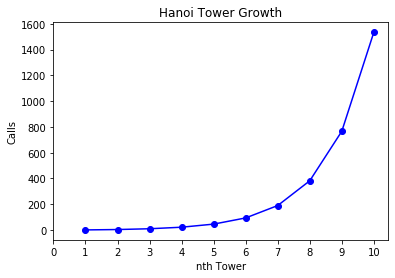

In [51]:
values, calls = zip(*sorted(growth.items()))
plt.plot(values, calls,'bo-')
plt.xlabel("nth Tower")
plt.ylabel('Calls')
plt.xticks(list(range(0,11,1)))
plt.title('Hanoi Tower Growth')
plt.show()